In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(1)

In [2]:
class Bandit:
    def __init__(self, ground_truth, epsilon):
        self.k = len(ground_truth)
        self.epsilon = epsilon
        self.ground_truth = ground_truth

    def _select_action(self):
        if rng.random() < self.epsilon:
            # Exploration
            return rng.integers(0, self.k)
        else:
            # Exploitation
            return np.argmax(self.q_values)

    def _get_reward_from_action(self, a):
        return rng.normal(self.ground_truth[a], 1)

    def launch(self, n):
        rewards_history = np.full(n, 0.0)  # for plotting
        accum_reward = 0.0
        # mapping between action and value (sample-average method)
        self.q_values = np.full(self.k, 0.0)
        self.action_counts = np.full(self.k, 0.0)

        for i in range(n):
            a = self._select_action()
            r = self._get_reward_from_action(a)
            self.action_counts[a] += 1
            accum_reward += r
            rewards_history[i] = accum_reward / (i + 1)
            # update average value of action
            self.q_values[a] += (r - self.q_values[a]) / self.action_counts[a]

        return rewards_history

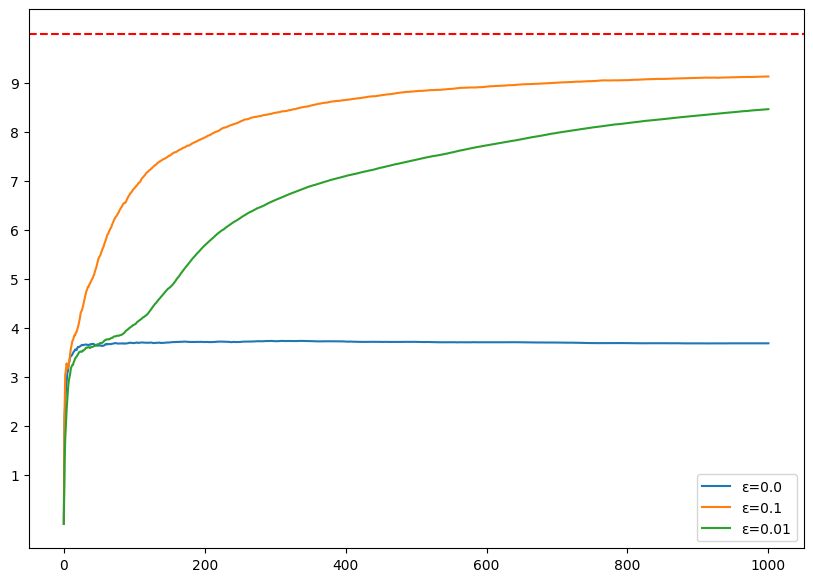

In [3]:
N = 1000
x = np.linspace(0, N, N)
ground_truth = np.array([1, 10, 2, 3, 7, 6, 4, 6, 2, 1])

fig = plt.figure(figsize=(10, 7))

for epsilon in [0.0, 0.1, 0.01]:
    run_rewards = []
    for run_count in range(10):  # reduce noise
        b = Bandit(ground_truth, epsilon)
        run_rewards.append(b.launch(N))

    averaged_rewards = np.full(N, 0.0)

    for r in run_rewards:
        averaged_rewards += r

    averaged_rewards /= len(run_rewards)

    averaged_rewards[0] = 0.0
    plt.plot(x, averaged_rewards, label=f'ε={epsilon}')

max_exp = max(ground_truth)

plt.axhline(y=max_exp, color='r', linestyle='--')
plt.yticks(np.arange(min(ground_truth), max_exp, 1))
plt.legend()
plt.show()